In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

from database_operations import DatabaseOperations
from overtake_model import OvertakingModel
from race_data import RaceDataSetup
from race_dataframe import RaceDataframe
from race_sim import RaceSimulator
from evaluation import RaceSimEvaluation, EvaluateMany

import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None) 

## Mexico GP

In [2]:
# Initialise all classes
database_ops_mexico = DatabaseOperations(2024, "Mexico City")
race_df_mexico = RaceDataframe(database_ops_mexico)
race_data_mexico = RaceDataSetup(database_ops_mexico, race_df_mexico)
overtake_model_mexico = OvertakingModel(race_df_mexico.race_df)
simulation_mexico = RaceSimulator(race_data_mexico, overtake_model_mexico)

In [3]:
simulation_mexico.simulate()
evaluation_mexico = RaceSimEvaluation(simulation_mexico, race_df_mexico, database_ops_mexico)
evaluation_mexico.comparison_df


,driver_name,laps_completed,position_sim,position_actual,position_error,overtakes_sim,overtakes_actual,overtake_error,cumulative_time_sim,cumulative_time_actual,cumulative_time_error,gap_to_leader_sim,gap_to_leader_actual,gap_error
0,Carlos Sainz,71,1,1.0,0.0,6,0,6,6263.274114,6054.508714,208.7654,0.0,0.0,0.0
1,Lando Norris,71,2,2.0,0.0,1,2,-1,6265.449308,6058.727243,206.722065,2.175194,4.218529,-2.043334
2,Charles Leclerc,71,3,3.0,0.0,7,1,6,6288.469647,6088.265186,200.204462,25.195533,33.756471,-8.560938
3,Lewis Hamilton,71,4,4.0,0.0,6,2,4,6299.578047,6098.342071,201.235976,36.303933,43.833357,-7.529424
4,Oscar Piastri,71,5,8.0,-3.0,7,4,3,6310.674003,6115.130114,195.543889,47.399889,60.6214,-13.221511
5,George Russell,71,6,5.0,1.0,3,2,1,6311.681661,6102.109700,209.571961,48.407547,47.600986,0.806562
6,Max Verstappen,71,7,6.0,1.0,2,4,-2,6317.422278,6114.701529,202.720749,54.148164,60.192814,-6.044651
7,Kevin Magnussen,71,8,7.0,1.0,7,1,6,6327.308067,6116.996357,210.31171,64.033953,62.487643,1.54631
8,Nico Hulkenberg,70,9,9.0,0.0,4,2,2,6343.899743,6055.841275,288.058468,80.625629,81.917561,-1.291932
9,Pierre Gasly,70,10,10.0,0.0,2,3,-1,6363.300474,6054.883460,308.417015,100.02636,80.959745,19.066615


In [4]:
print(evaluation_mexico.comparison_df["overtakes_actual"].sum())
print(evaluation_mexico.comparison_df["overtakes_sim"].sum())

66
84


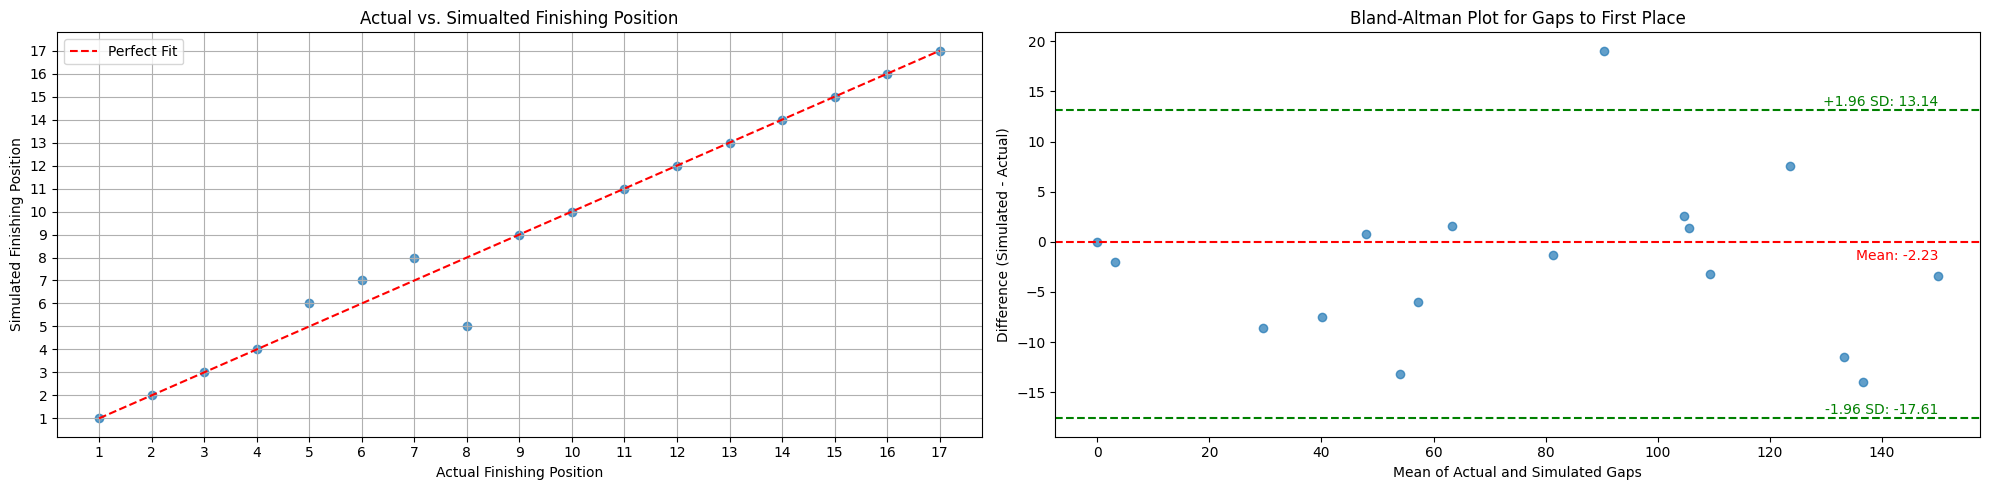

In [5]:
evaluation_mexico.plot_evaluation_results()

In [6]:
evaluation_mexico.calculate_general_errors()

{'total_absolute_position_error': 6.0,
 'position_mae': np.float64(0.35294117647058826),
 'total_absolute_overtake_error': np.int64(58),
 'overtake_mae': np.float64(3.411764705882353),
 'cumulative_time_mae': np.float64(249.1944472117113),
 'gap_mae': np.float64(6.104479958412573)}

In [7]:
evaluation_mexico.calculate_spearman()

{'cumulative_times': {'correlation': np.float64(0.38970588235294124),
  'p_value': np.float64(0.12203439858782986)},
 'gaps_to_leader': {'correlation': np.float64(0.9901960784313727),
  'p_value': np.float64(3.07362545045533e-14)}}

In [8]:
evaluation_mexico.calculate_wilcoxon()

{'cumulative_times': {'statistic': np.float64(0.0),
  'expected_value': np.float64(76.5),
  'p_value': np.float64(1.52587890625e-05)},
 'gaps_to_leader': {'statistic': np.float64(41.0),
  'expected_value': np.float64(68.0),
  'p_value': np.float64(0.16267331507194682)}}

## Singapore GP

In [9]:
# Initialise all classes
database_ops_singapore = DatabaseOperations(2024, "Marina Bay")
race_df_singapore = RaceDataframe(database_ops_singapore)
race_data_singapore = RaceDataSetup(database_ops_singapore, race_df_singapore)
overtake_model_singapore = OvertakingModel(race_df_singapore.race_df)
simulation_singapore = RaceSimulator(race_data_singapore, overtake_model_singapore)

In [10]:
simulation_singapore.simulate()
evaluation_singapore = RaceSimEvaluation(simulation_singapore, race_df_singapore, database_ops_singapore)
evaluation_singapore.comparison_df

,driver_name,laps_completed,position_sim,position_actual,position_error,overtakes_sim,overtakes_actual,overtake_error,cumulative_time_sim,cumulative_time_actual,cumulative_time_error,gap_to_leader_sim,gap_to_leader_actual,gap_error
0,Lando Norris,62,1,1,0,0,0,0,6250.063474,6050.476082,199.587392,0.0,0.0,0.0
1,Max Verstappen,62,2,2,0,0,1,-1,6276.788113,6070.855230,205.932884,26.724639,20.379148,6.345492
2,Oscar Piastri,62,3,3,0,1,1,0,6293.795844,6089.834016,203.961828,43.73237,39.357934,4.374436
3,Charles Leclerc,62,4,5,-1,1,2,-1,6311.925221,6109.575049,202.350172,61.861747,59.098967,2.76278
4,George Russell,62,5,4,1,0,3,-3,6314.709868,6109.664492,205.045376,64.646394,59.18841,5.457984
5,Lewis Hamilton,62,6,6,0,0,4,-4,6336.947314,6134.844639,202.102675,86.88384,84.368557,2.515282
6,Carlos Sainz,62,7,7,0,1,3,-2,6338.944975,6142.160951,196.784024,88.8815,91.684869,-2.803368
7,Fernando Alonso,61,8,8,0,4,3,1,6343.952119,6048.572983,295.379135,93.888644,96.018901,-2.130257
8,Franco Colapinto,61,9,11,-2,5,2,3,6344.511214,6053.272250,291.238964,94.44774,100.718168,-6.270428
9,Nico Hulkenberg,61,10,9,1,1,2,-1,6351.119497,6051.586333,299.533164,101.056023,99.032251,2.023771


In [11]:
print(evaluation_singapore.comparison_df["overtakes_actual"].sum())
print(evaluation_singapore.comparison_df["overtakes_sim"].sum())

58
30


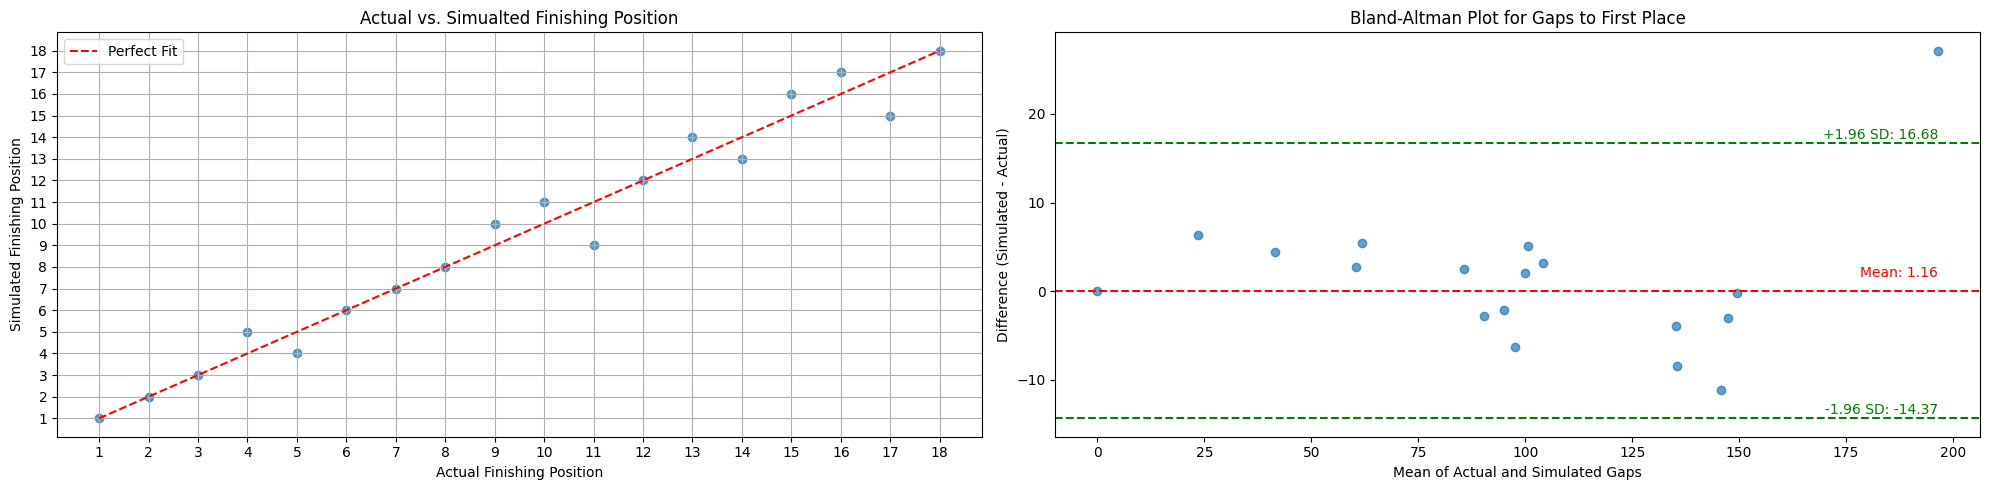

In [12]:
evaluation_singapore.plot_evaluation_results()

In [13]:
evaluation_singapore.calculate_general_errors()

{'total_absolute_position_error': 12,
 'position_mae': np.float64(0.6666666666666666),
 'total_absolute_overtake_error': np.int64(33),
 'overtake_mae': np.float64(1.8333333333333333),
 'cumulative_time_mae': np.float64(260.5853980397017),
 'gap_mae': np.float64(5.385300022772096)}

In [14]:
evaluation_singapore.calculate_spearman()

{'cumulative_times': {'correlation': np.float64(0.19091847265221878),
  'p_value': np.float64(0.4479306707266415)},
 'gaps_to_leader': {'correlation': np.float64(0.9834881320949431),
  'p_value': np.float64(2.6382891204281573e-13)}}

In [15]:
evaluation_singapore.calculate_wilcoxon()

{'cumulative_times': {'statistic': np.float64(0.0),
  'expected_value': np.float64(85.5),
  'p_value': np.float64(7.62939453125e-06)},
 'gaps_to_leader': {'statistic': np.float64(70.0),
  'expected_value': np.float64(76.5),
  'p_value': np.float64(0.7583123742610346)}}

## Spanish GP

In [16]:
# Initialise all classes
database_ops_spain = DatabaseOperations(2024, "Barcelona")
race_df_spain = RaceDataframe(database_ops_spain)
race_data_spain = RaceDataSetup(database_ops_spain, race_df_spain)
overtake_model_spain = OvertakingModel(race_df_spain.race_df)
simulation_spain = RaceSimulator(race_data_spain, overtake_model_spain)

In [17]:
simulation_spain.simulate()
evaluation_spain = RaceSimEvaluation(simulation_spain, race_df_spain, database_ops_spain)
evaluation_spain.comparison_df

,driver_name,laps_completed,position_sim,position_actual,position_error,overtakes_sim,overtakes_actual,overtake_error,cumulative_time_sim,cumulative_time_actual,cumulative_time_error,gap_to_leader_sim,gap_to_leader_actual,gap_error
0,Lando Norris,66,1,2,-1,2,2,0,5507.238154,5298.667708,208.570446,0.000000,1.738908,-1.738908
1,Max Verstappen,66,2,1,1,1,2,-1,5508.112470,5296.928800,211.183670,0.874316,0.000000,0.874316
2,Lewis Hamilton,66,3,3,0,7,5,2,5515.482692,5314.002231,201.480461,8.244538,17.073431,-8.828893
3,George Russell,66,4,4,0,0,7,-7,5526.490033,5319.782723,206.707309,19.251879,22.853923,-3.602044
4,Carlos Sainz,66,5,6,-1,4,7,-3,5532.528361,5326.665123,205.863238,25.290207,29.736323,-4.446116
5,Charles Leclerc,66,6,5,1,0,4,-4,5533.676203,5318.698769,214.977434,26.438049,21.769969,4.668080
6,Oscar Piastri,66,7,7,0,4,4,0,5536.572377,5329.063292,207.509085,29.334223,32.134492,-2.800269
7,Pierre Gasly,66,8,9,-1,15,7,8,5551.381007,5357.580369,193.800638,44.142853,60.651569,-16.508716
8,Sergio Perez,66,9,8,1,5,6,-1,5551.841125,5354.423585,197.417540,44.602971,57.494785,-12.891814
9,Esteban Ocon,66,10,10,0,0,7,-7,5576.192338,5367.007923,209.184415,68.954184,70.079123,-1.124939


In [18]:
print(evaluation_spain.comparison_df["overtakes_actual"].sum())
print(evaluation_spain.comparison_df["overtakes_sim"].sum())

116
81


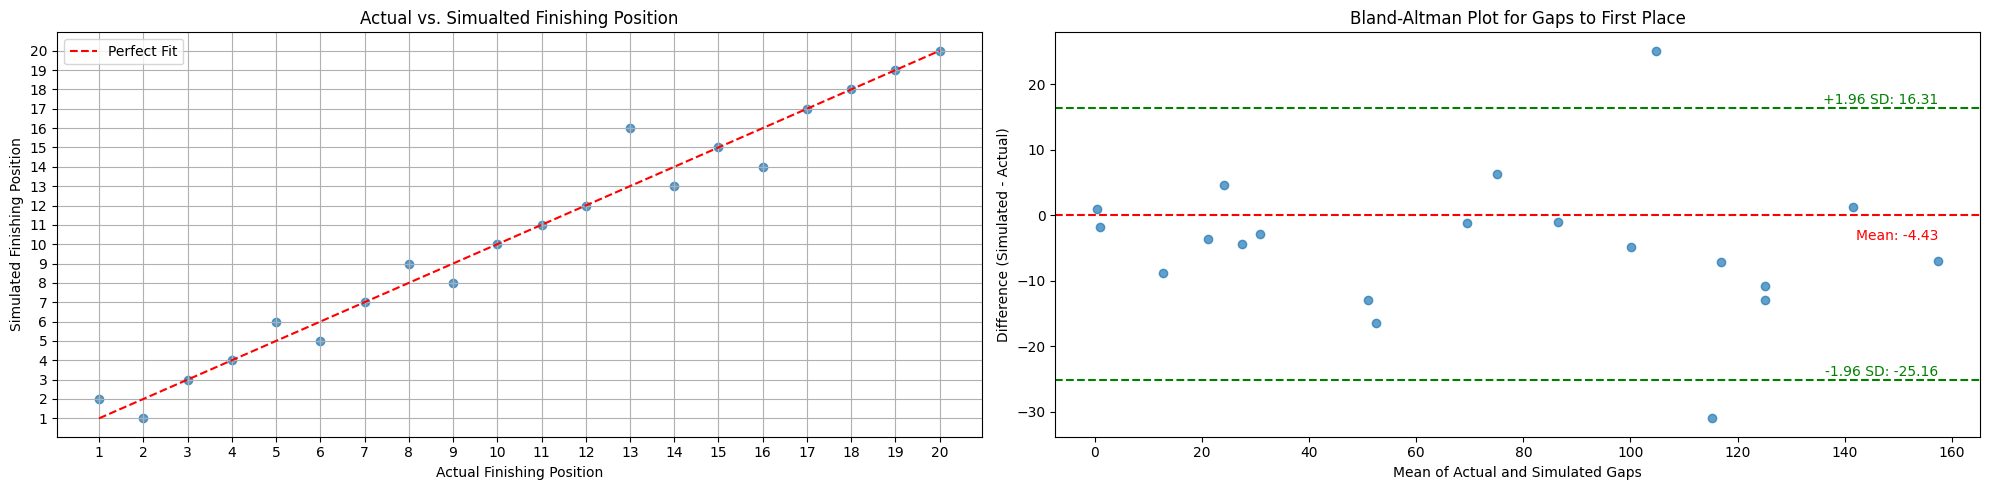

In [19]:
evaluation_spain.plot_evaluation_results()

In [20]:
evaluation_spain.calculate_general_errors()

{'total_absolute_position_error': 12,
 'position_mae': np.float64(0.6),
 'total_absolute_overtake_error': np.int64(69),
 'overtake_mae': np.float64(3.45),
 'cumulative_time_mae': np.float64(245.7537570745943),
 'gap_mae': np.float64(8.252850792518938)}

In [21]:
evaluation_spain.calculate_spearman()

{'cumulative_times': {'correlation': np.float64(0.28872180451127816),
  'p_value': np.float64(0.21699266668730374)},
 'gaps_to_leader': {'correlation': np.float64(0.9744360902255638),
  'p_value': np.float64(4.0365222137155066e-13)}}

In [22]:
evaluation_spain.calculate_wilcoxon()

{'cumulative_times': {'statistic': np.float64(0.0),
  'expected_value': np.float64(105.0),
  'p_value': np.float64(1.9073486328125e-06)},
 'gaps_to_leader': {'statistic': np.float64(44.0),
  'expected_value': np.float64(105.0),
  'p_value': np.float64(0.021484375)}}

In [23]:
from docx import Document
import os
import pandas as pd

def dataframe_to_word(df, race_name, base_folder="tables_word"):
    """
    Converts a pandas DataFrame to a Word table and saves it in a folder named after the race.

    Args:
        df (pd.DataFrame): The DataFrame to convert.
        race_name (str): The name of the race (e.g., "Mexico GP").
        base_folder (str): The base folder where all race folders will be created.
    """
    # Create the base folder if it doesn't exist
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)

    # Define the file path for the Word document
    file_name = os.path.join(base_folder, f"{race_name.replace(' ', '_')}_comparison_table.docx")

    # Create a new Word document
    doc = Document()

    # Add a title to the document
    doc.add_heading(f"{race_name} Comparison Table", level=1)

    # Format DataFrame: Round floats to 3 decimal places and convert integers where applicable
    def format_value(value):
        if isinstance(value, float):
            # Check if the float is effectively an integer
            if value.is_integer():
                return str(int(value))  # Convert to integer string representation
            else:
                return f"{value:.3f}"  # Round to 3 decimal places
        return str(value)  # Return as string for non-float values

    # Apply formatting to all elements in the DataFrame
    formatted_data = [[format_value(cell) for cell in row] for row in df.values]
    formatted_columns = [str(col) for col in df.columns]

    # Combine headers and formatted data
    table_data = [formatted_columns] + formatted_data

    # Add a table to the document
    num_rows = len(table_data)
    num_cols = len(df.columns)
    table = doc.add_table(rows=num_rows, cols=num_cols)

    # Populate the table with data
    for row_idx, row_data in enumerate(table_data):
        for col_idx, cell_data in enumerate(row_data):
            table.cell(row_idx, col_idx).text = cell_data

    # Apply basic styling to the table
    table.style = "Table Grid"

    # Save the document
    doc.save(file_name)
    print(f"Word document saved as '{file_name}'.")

# Example usage
dataframe_to_word(
    evaluation_mexico.comparison_df[["driver_name", "laps_completed", "position_sim", "position_actual", "overtake_error", "cumulative_time_error", "gap_error"]],
    race_name="Mexico GP"
)
dataframe_to_word(
    evaluation_singapore.comparison_df[["driver_name", "laps_completed", "position_sim", "position_actual", "overtake_error", "cumulative_time_error", "gap_error"]],
    race_name="Singapore GP"
)
dataframe_to_word(
    evaluation_spain.comparison_df[["driver_name", "laps_completed", "position_sim", "position_actual", "overtake_error", "cumulative_time_error", "gap_error"]],
    race_name="Spain GP"
)

Word document saved as 'tables_word/Mexico_GP_comparison_table.docx'.
Word document saved as 'tables_word/Singapore_GP_comparison_table.docx'.
Word document saved as 'tables_word/Spain_GP_comparison_table.docx'.
